# Project- Flight Price Prediction 

#### This is the regression problem. problem statement -  predict the flight cost 

### Install the following Libraries in anaconda prompt,these libraries are used to plot the graph
#### pip install chart_studio
#### pip install cufflinks
#### pip install pandas-profiling


In [2]:
# import libraries
'''
Cufflinks is another library that connects the Pandas data frame with Plotly enabling users 
to create visualizations directly from Pandas. The library binds the power of Plotly with the 
flexibility of Pandas for easy plotting


The plotly Python library is an interactive, open-source plotting library that supports 
over 40 unique chart types covering a wide range of statistical, financial, geographic, 
scientific, and 3-dimensional use-cases.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns
%matplotlib inline
import os


In [3]:
# Check Current Directory 
os.getcwd()

'C:\\Users\\hp\\Batch 67 Day 33\\Project 12 Flight Price Predict Heroku'

In [4]:
# Change the directory 
os.chdir ('C:\\Users\\hp\\Batch 67 Day 33\\Project 12 Flight Price Predict Heroku\\')
os.getcwd()


'C:\\Users\\hp\\Batch 67 Day 33\\Project 12 Flight Price Predict Heroku'

In [5]:
# Read Data, display records
df=pd.read_excel("Data_Train.xlsx")
display(df)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Automated Exploratory Data Analysis (EDA)

##### pandas profiling analyze the data and it gives summary

In [7]:
from pydantic_settings import BaseSettings


In [8]:
import ydata_profiling as pf
display(pf.ProfileReport(df))  

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Manual EDA

In [11]:
# Number of records
len(df)

10683

In [12]:
# Number of records -Shape - no. of rows, columns
display (df.shape)

(10683, 11)

In [13]:
#checking the data types of each column
display (df.dtypes )

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
# Checking null values
display (df.isna().sum() )

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
#Remove the NaN values (records) from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
# Display Number of records- Number of records reduced by 1 , since we removed null record
display (df.shape)

(10682, 11)

### Feature Engineering

In [18]:
# Display top 5 Records 
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [19]:
# Feature Engineering
# Date_of_Journey has object datatype - convert it into date datatype
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey']) # Chanage Data type- from Object to Date and Time


C:\Users\hp\AppData\Local\Temp\ipykernel_5604\1688409655.py:4: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


##### Split Date of Journey column to Day and Month 
##### Added two additional columns Day and Month
##### drop Date_of_journey column

In [ ]:
# extract day 
# extract month - because we can do analysis like how many flights are there in a month
# if there is direct date column we cant do these sort of analysis
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day # Day column 
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month # Month Column 
display(df)


In [20]:
# Drop the column - Date_of_journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)
display(df.head())

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [21]:
#convert to datetime and  then Split Dep_Time column to hour and minutes 
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
display(df.head())

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [22]:
#Drop the column 'Dep_Time'
df.drop(["Dep_Time"],axis=1,inplace=True)
display(df.head())

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [23]:
#convert to datetime and Split Arrival_Time column to hour and minutes 
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
display(df.head())

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
#Drop the column 'Arrival_Time'
df.drop(["Arrival_Time"],axis=1,inplace=True)
display(df.head())

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


###### we do all these convertion because object column(. , / -) cannot be directly convert to integer
###### so first we have to remove this (. , / -), if present . then we convert the column to numeric format for analysis purpose

## Extract hours and minutes from duration

In [26]:
# Display Duration column
# we can see all duration which has 00 minutes , there only hours are displayed, minutes 00 is not given
display (df['Duration'])

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

##### we need to add those 00 minutes

In [27]:
# Split Duration into two columns hours and minutes 
'''
split duration column/datapoints based on space ' '

expand : bool, default False

Expand the splitted strings into separate columns.

If True, return DataFrame/MultiIndex expanding dimensionality.
If False, return Series/Index, containing lists of strings.
'''

duration=df['Duration'].str.split(' ',expand=True) 
display (duration)

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


#### we can see where minutes is 00 , it is displaying None, we need to fill it

In [28]:
#In column 1 i.e minutes column , fill all NULL values with  '00m'
duration[1].fillna('00m',inplace=True)  
display (duration)

,0,1
0,2h,50m
1,7h,25m
2,19h,00m
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,00m
10681,2h,40m


In [29]:
# removing h from hours column
#Extract the hours ie 0th column by excluding last character h x[:-1]
#select the item at index o and leave the last one (in this case the 'h')
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) 
display (df['duration_hr'])

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: duration_hr, Length: 10682, dtype: object

In [30]:
# removing m from minutes column
#Extract the minutes, select the item at index 1 and leave the last one (in this case the 'm')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) 
display (df['duration_min'])

0        50
1        25
2        00
3        25
4        45
         ..
10678    30
10679    35
10680    00
10681    40
10682    20
Name: duration_min, Length: 10682, dtype: object

In [31]:
# Drop the column 'Duration' then display Data Frame
df.drop(["Duration"],axis=1,inplace=True)
display (df)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,00
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40


## Visualizations

In [33]:
# Config file
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [34]:
# Count of Airlines
# how many records corresponding to each distinct value
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

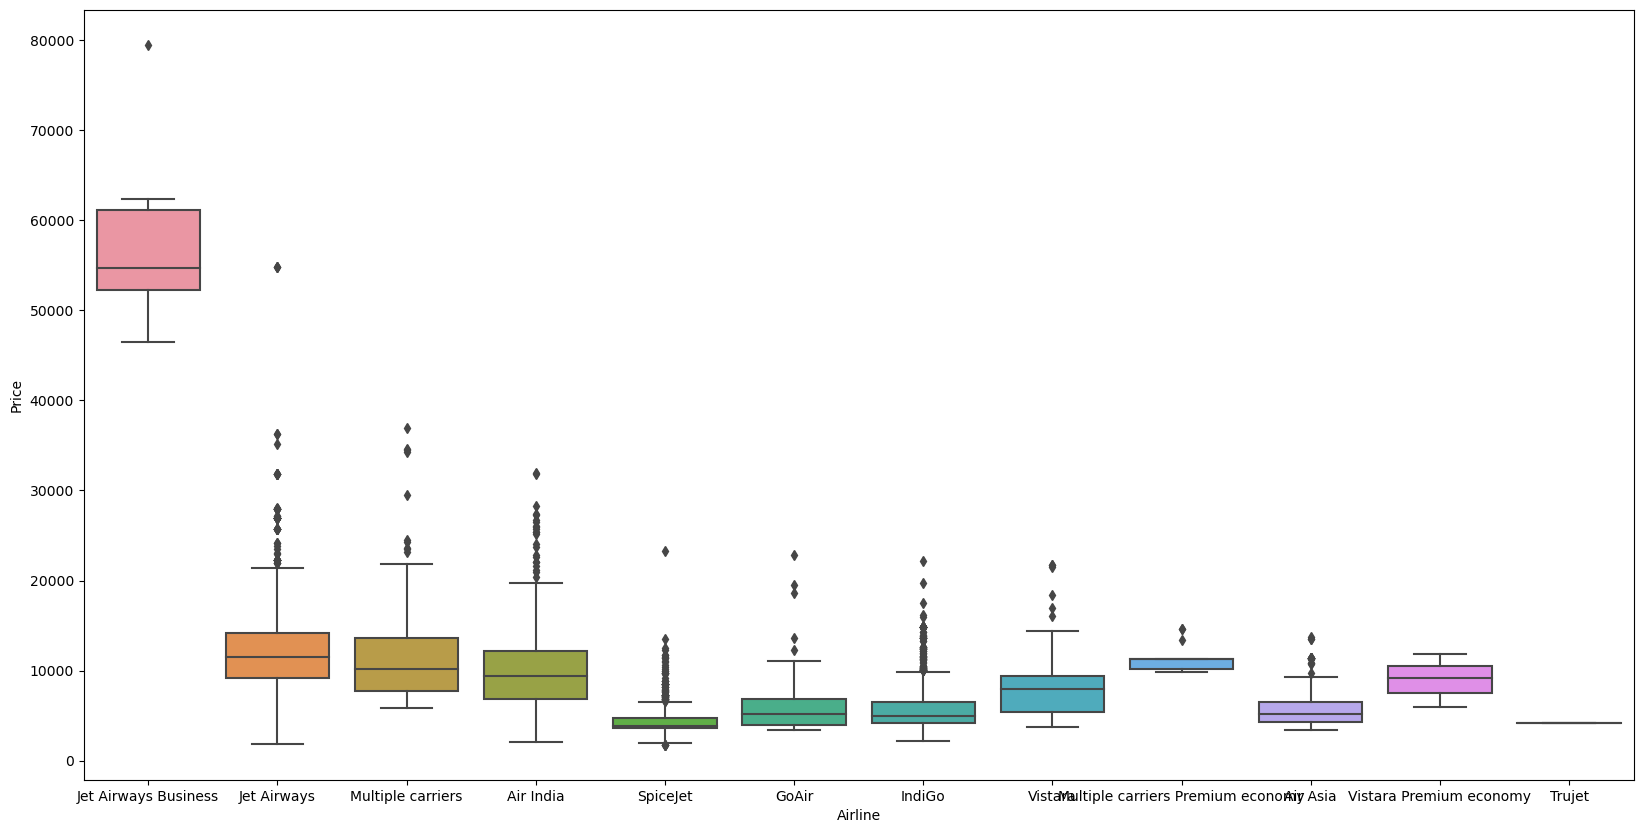

In [37]:
# Box Plot Airline VS Price
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show()

In [38]:
# Price based on number of stops
# checking whether there is any relationship between price and number of stops
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

##### answer = 1 stop   average price is 7078.32558
##### non - stop is cheaper

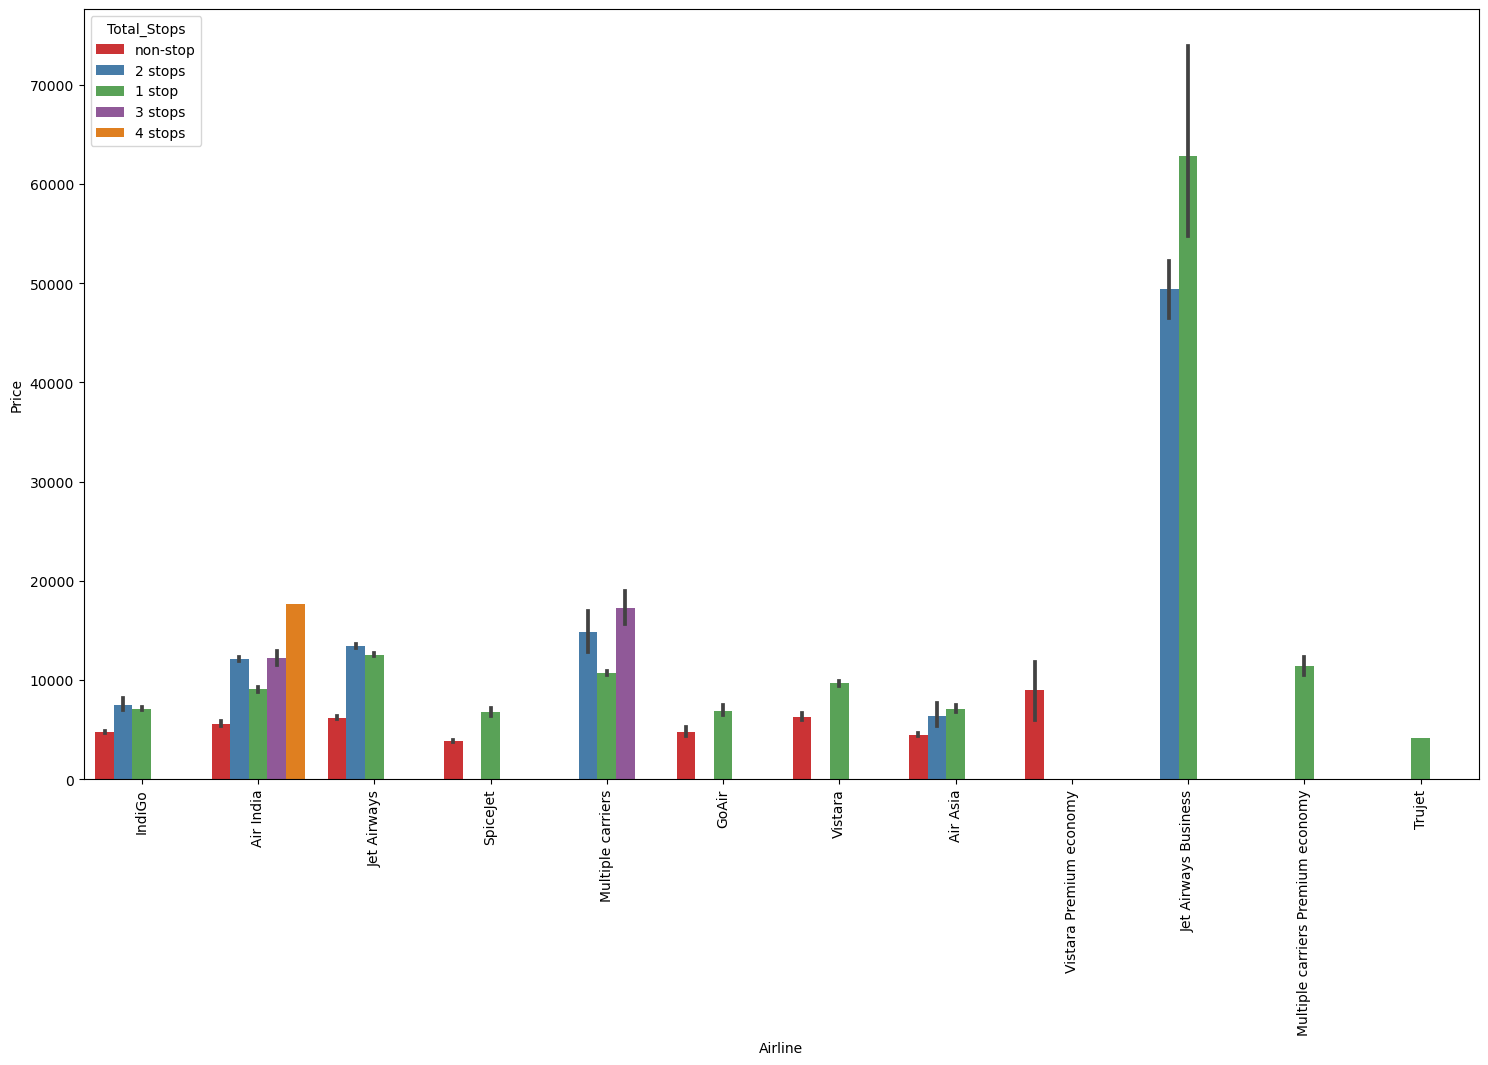

In [39]:
# Bar Plot - Same Details in  bar chart 
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

##### One stop and two stops Jet Airways Business is having the highest price

In [40]:
# Number of flights from different Airports
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

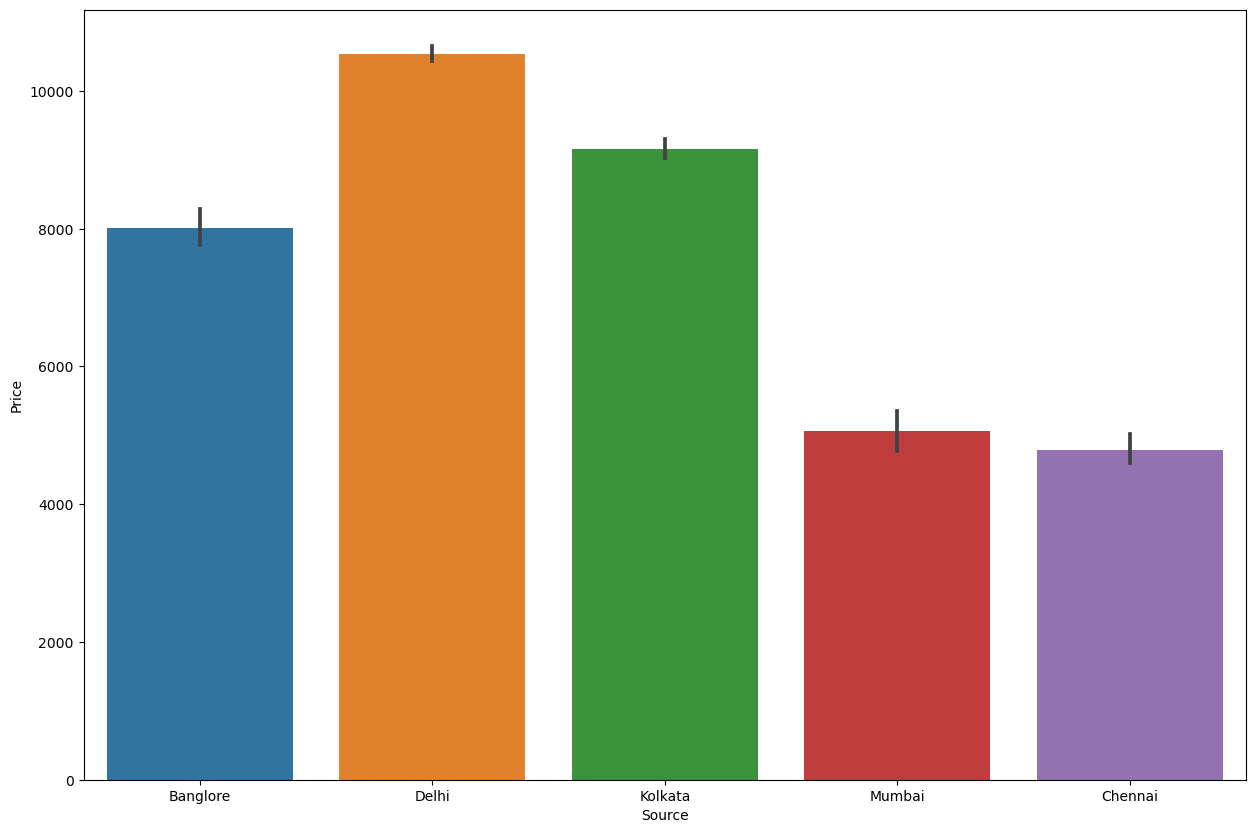

In [41]:
# Source vs Price
# based on airports , we check whether there is any difference in prices
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()

In [42]:
# Flights in the destination
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

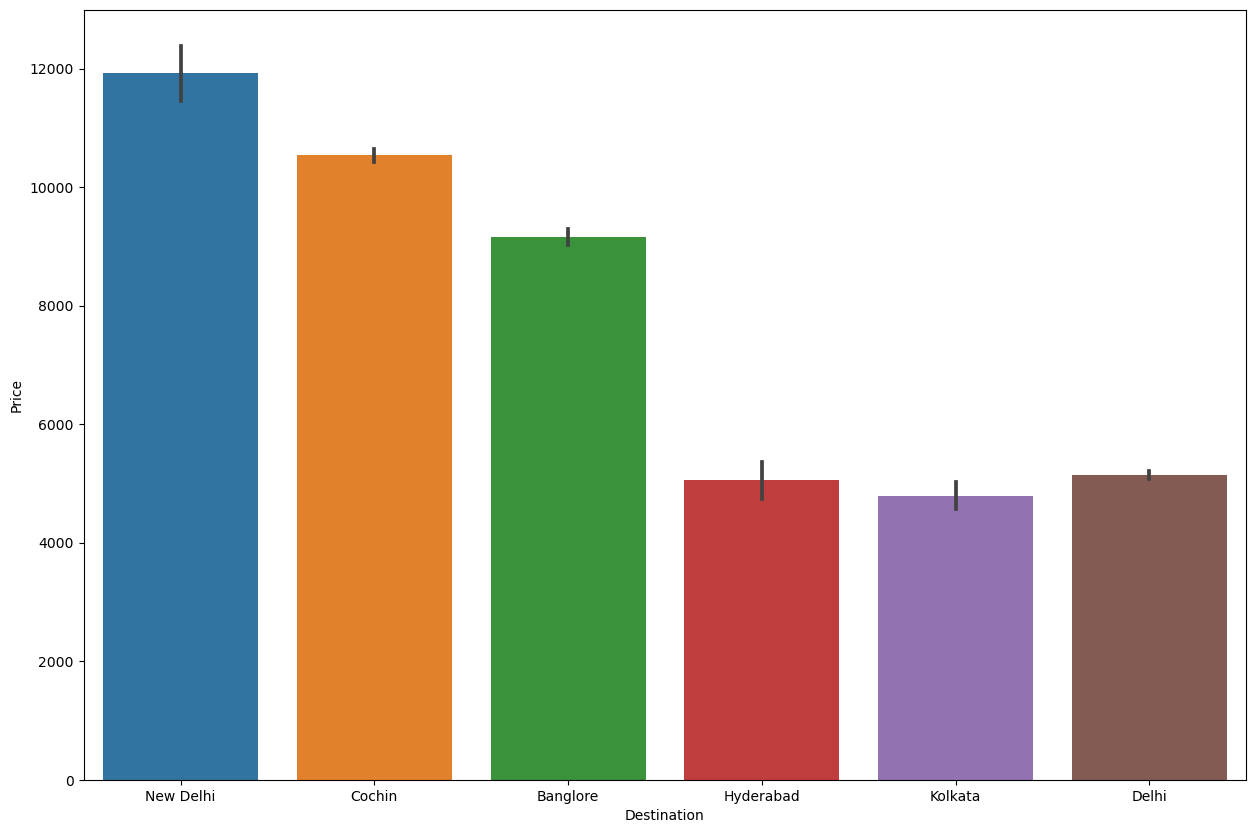

In [43]:
#Destination vs Price
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

In [44]:
# There is New Delhi and Delhi in the data set, replace New Delhi with Delhi
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [45]:
# Display Unique Destinations
display(df['Destination'].unique())

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [46]:
# Flights in the destination after consolidation
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

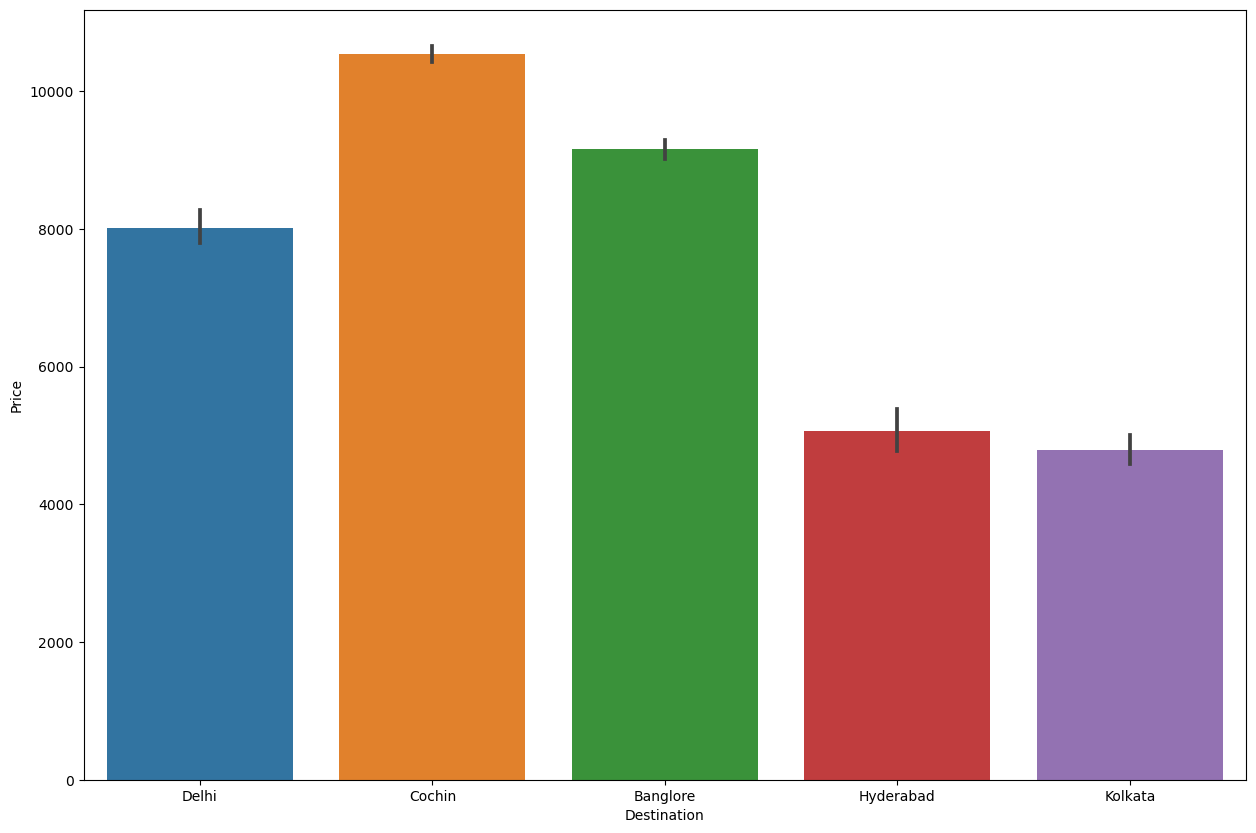

In [47]:
# Create Bar Plot again with Price 
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5604\1417610816.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



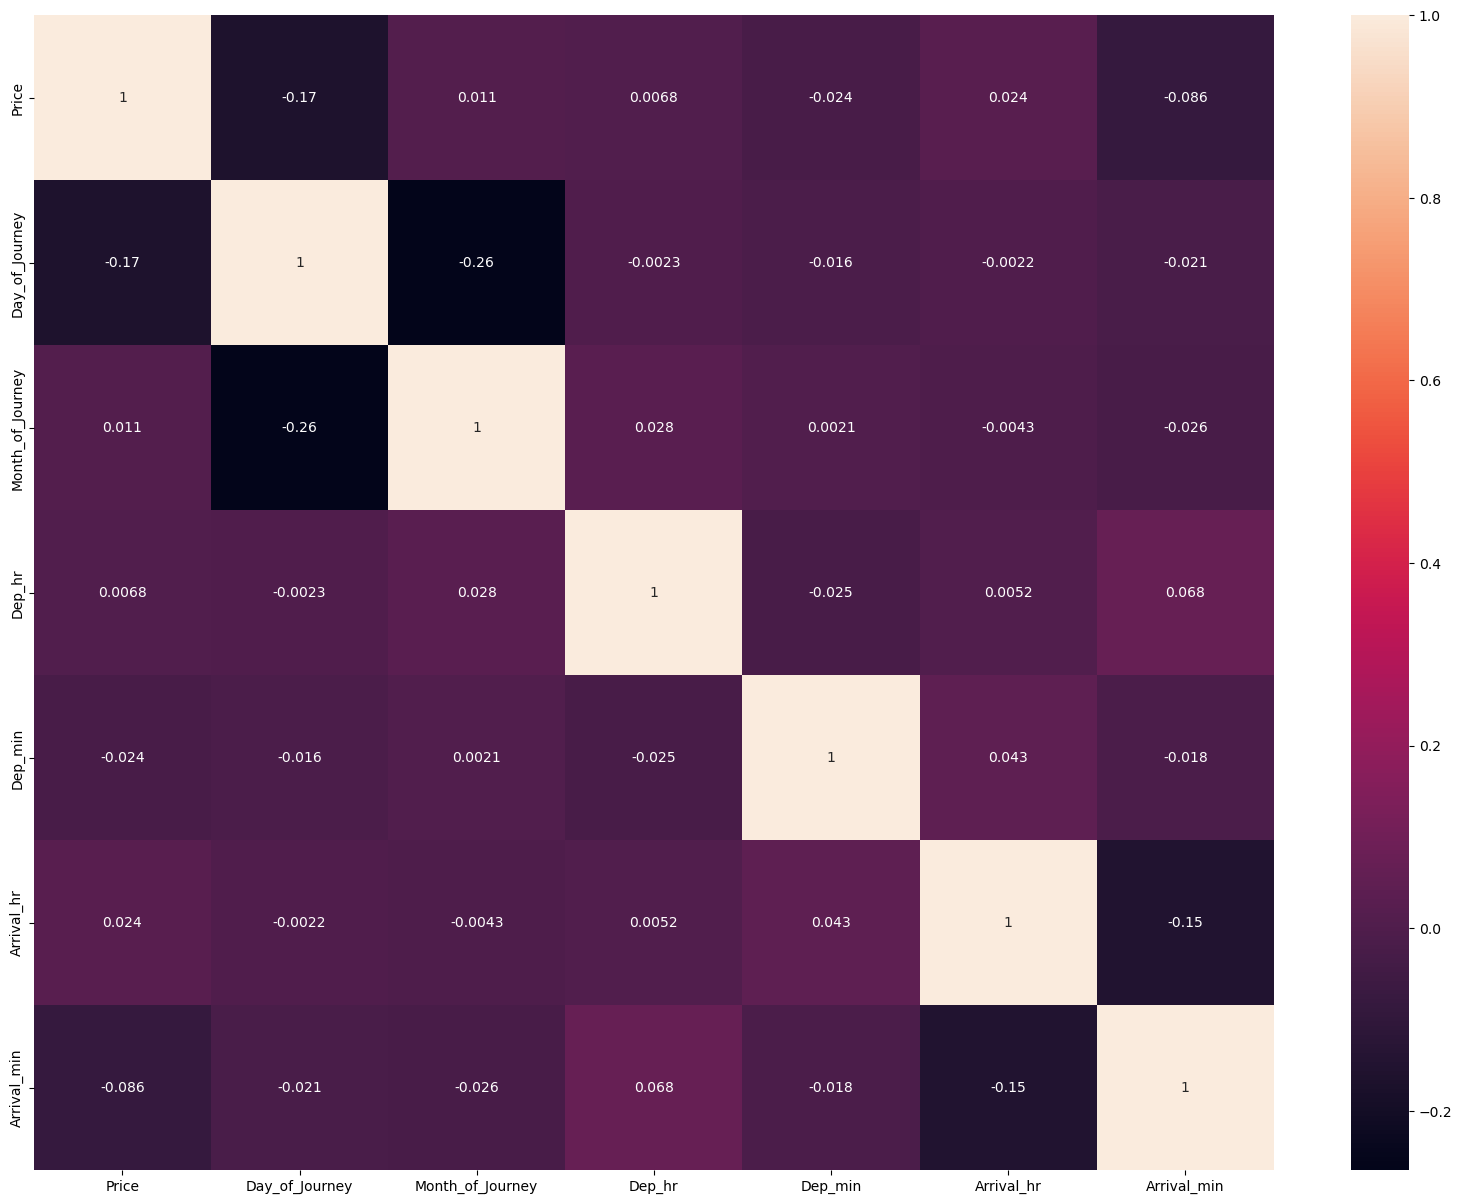

In [48]:
# Create Heat Map - Co relation Matrix - it checks whether Multicollinearity exist or not
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### The features are less correlated which is a good thing for us to avoid Multicollinearity

In [50]:
# Display Data Frame - top 4 records
display (df.head(4))

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25


### Label Encoding

In [51]:
# Label Encoding - Column 'Total_Stops'
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
display (df.head(4))

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25


### One Hot Encoding

In [52]:
# One Hot Encoding -Column "Airline"- Due to drop_first, there is no column for Air Asia
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
display (air_dummy)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [53]:
# One hot encoding for columns 'Source','Destination' Due to drop first Source Cochin column Dropped 
source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
display (source_dest_dummy)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
10678,0,0,1,0,0,0,0,0
10679,0,0,1,0,0,0,0,0
10680,0,0,0,0,0,1,0,0
10681,0,0,0,0,0,1,0,0


In [54]:
# Concatenate Label Encoded and one hot encoded columns into main data frame
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)
display (df.head(4))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25


In [55]:
#Drop Columns -Already Label Encoded/One Hot Encoded  so we remove it from the main dataframe
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [56]:
# Display shapes - no. of rows, columns
# columns has increased 
display (df.shape)

(10682, 31)

###### In the folder we have two dataset.  separate dataset of training and separate dataset for testing
###### we can create,train the model with training dataset
###### Test_set.xlsx dataset is used for testing, future prediction

###### whatever cleaning we did in previous above training dataset, same should be done for testing dataset - Test_set.xlsx dataset 

### Modify Test Data - cleaning  Test_set.xlsx dataset

In [58]:
# Read Test Data
df_test=pd.read_excel("Test_set.xlsx")
display(df_test)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [59]:
# Perform all data manipulation steps in Test Data 
#Column - 'Date_of_Journey' – Extract Day and month  

# converting Date_of_Journey column to datetime datatype, then extract day and month
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
#converting Dep_time  column to datetime datatype, then extract hour and minutes
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
# converting Arrival_time  column to datetime datatype, then extract hour and minutes
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

# Splitting duration  time
# wherever minutes are not there, fill with 00m
# Then remove h and m from dur_hr and dur_min
a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data - because we already have the related data splitted into different columns
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
# label encoding to Total_Stops column
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

# one hot encoding for Airline, Source, Destination column
air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)

# concatinate the one hot encoded value to the original dataframe
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)


C:\Users\hp\AppData\Local\Temp\ipykernel_5604\3522324661.py:4: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [60]:
# Drop additional Columns from Test Data 
# Airline','Source','Destination column is removed because it is already one hot enoded
# Additional_Info',is removed because most of the info arae Nan
# Route is removed because we already have total_stop column, so route column info is not needed
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)
display (df_test.head(4))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Destination_New Delhi,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,dur_hr,dur_min
0,0,0,0,1,0,0,0,0,0,0,...,0,1,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,...,0,1,5,12,6,20,10,20,4,00
2,0,0,0,1,0,0,0,0,0,0,...,0,1,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,...,0,1,21,5,8,0,21,0,13,00


In [61]:
# Print Shape of Training and Test Data 
print('train_shape',df.shape)
# Additional columns in training data set  'Route', 'Price','Additional_Info', can be removed later
# it is not removed yet so we see 3 extra column in training dataset
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [62]:
# Create X and Y from Training Data 
# remove Route', 'Price','Additional_Info from training dataset
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [63]:
# Display X 
display (x.head(3))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


## Model Building 

### 1. Model ExtraTreesRegressor

In [65]:
# Create Model ExtraTreesRegressor with Full Data Set 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)


ExtraTreesRegressor()

In [66]:
# Predict and Print Accuracy 
y_predict=ET_Model.predict(x)
display (r2_score(y,y_predict))

0.9633112303455986

##### accuracy of Model ExtraTreesRegressor is 96.33%

<Axes: >

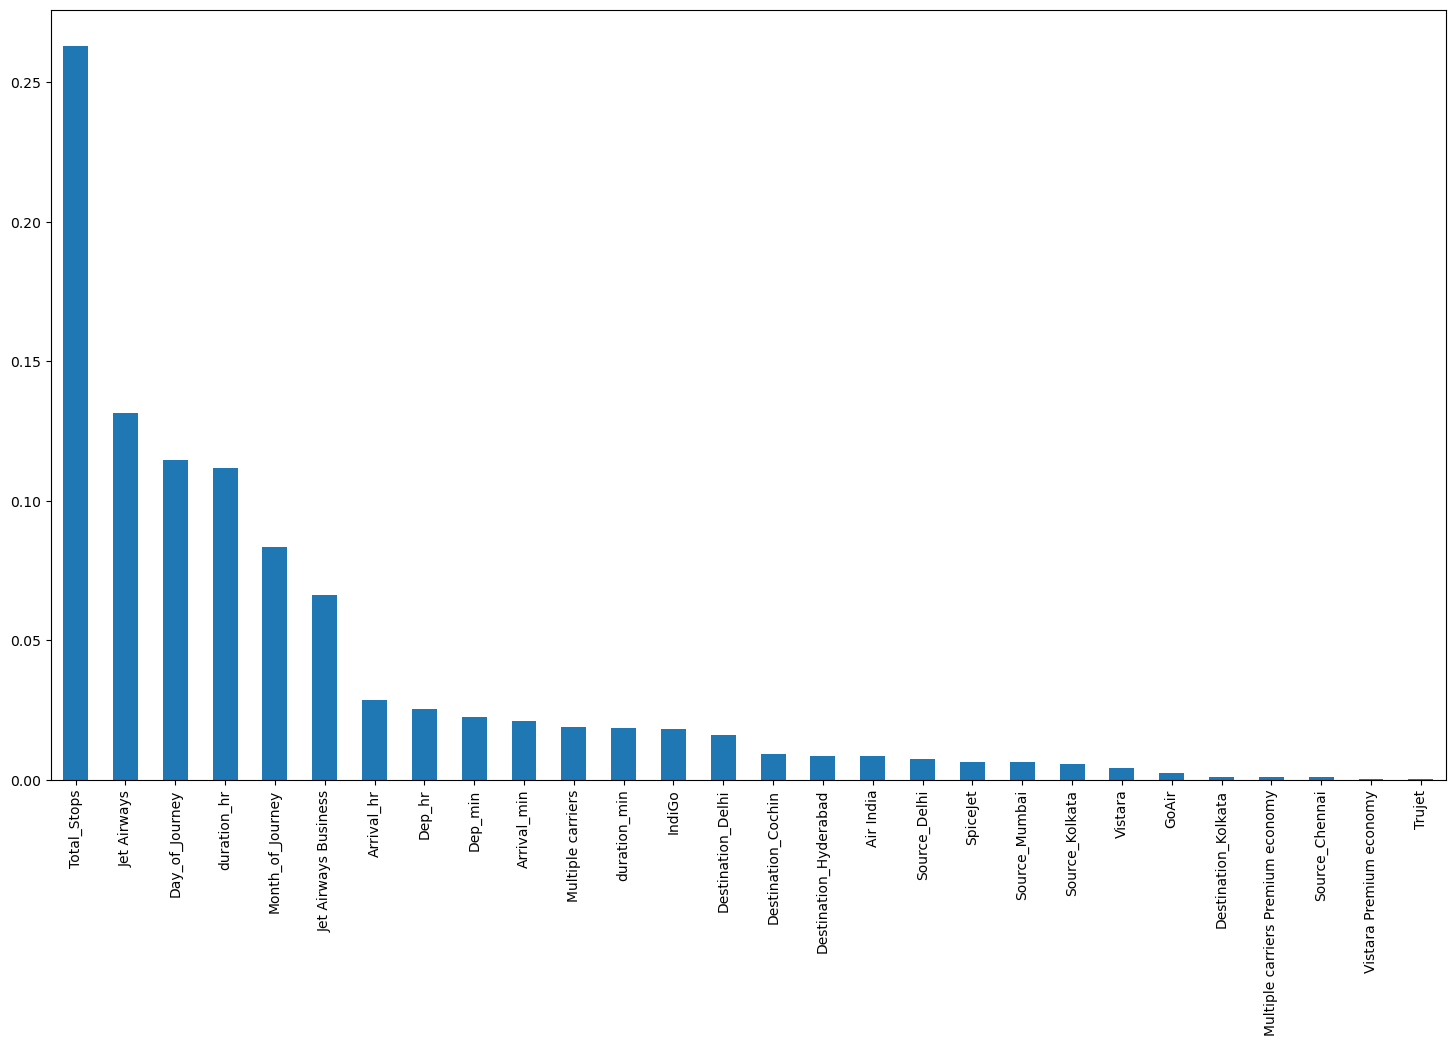

In [67]:
#Feature Importance Graph
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [68]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

### Model Extra Tree Regression

In [70]:
# Create Model Extra Tree Regression again
# Preparing Extra Tree Regression with Training Data 
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)


ExtraTreesRegressor(n_estimators=120)

In [71]:
# Prediction and Print Accuracy
y_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score
display (r2_score(y_test,y_predict))

0.7708024545752685

##### accuracy of Model ExtraTreesRegressor is 77.08%

### 2. Model Random Forest Regressor

In [73]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7910612229527357

##### accuracy of Model Random Forest Regressor is 79.10%

### 3. RandomizedSearchCV

In [74]:
# RandomizedSearchCV - uses specified number of combination of decision tree
# Hyperparameter Tuning and RandomizedSearchCV - Model used - RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)] # i want to crete random forest model with multiple no. of decision trees, stating from  80 upto 1500, with increment 10
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# Hyperparameter Tuning - whatever parameters we need, we need to create a dictionary
# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)  # cross validation is 3. that means 10*3 = 30 times model need to be created

In [75]:
# Fit Model
rCV.fit(X_train,y_train)

C:\Users\hp\Documents\Python Scripts\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\Documents\Python Scripts\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\Documents\Python Scripts\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\Documents\Python Scripts\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [76]:
# Prediction 
rf_pred=rCV.predict(X_test)
display (rf_pred)

array([11994.69842387,  4506.17726373,  6155.37883071, ...,
       11480.29872949,  9890.21509873,  8691.4947945 ])

In [77]:
# mean_absolute_error and mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1246.8880909617615
MSE 4141517.27331988


In [78]:
# Display Accuracy
display (r2_score(y_test,rf_pred))

0.7983060905360888

##### accuracy of RandomizedSearchCV Random Forest Regressor is 79.83%

### 4. Model CatBoostRegressor

##### install cat boost - anaconda prompt
##### pip install catboost

In [81]:
# Model CatBoostRegressor
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 152ms	remaining: 2m 31s
1:	learn: 4317.7245126	total: 155ms	remaining: 1m 17s
2:	learn: 4167.9871081	total: 157ms	remaining: 52.2s
3:	learn: 4030.4839609	total: 159ms	remaining: 39.6s
4:	learn: 3906.4844760	total: 162ms	remaining: 32.2s
5:	learn: 3785.4580402	total: 165ms	remaining: 27.4s
6:	learn: 3673.8662552	total: 169ms	remaining: 23.9s
7:	learn: 3582.0533069	total: 172ms	remaining: 21.3s
8:	learn: 3495.5629367	total: 175ms	remaining: 19.3s
9:	learn: 3404.7478335	total: 178ms	remaining: 17.6s
10:	learn: 3325.1004431	total: 181ms	remaining: 16.3s
11:	learn: 3254.1004651	total: 184ms	remaining: 15.2s
12:	learn: 3184.6084064	total: 187ms	remaining: 14.2s
13:	learn: 3122.3064005	total: 190ms	remaining: 13.4s
14:	learn: 3067.6550706	total: 194ms	remaining: 12.8s
15:	learn: 3014.5169632	total: 199ms	remaining: 12.2s
16:	learn: 2962.4252595	total: 203ms	remaining: 11.7s
17:	learn: 2920.1931240	total: 206ms	remaining: 11.2s
18:	le

178:	learn: 1914.5686236	total: 765ms	remaining: 3.51s
179:	learn: 1912.4008242	total: 769ms	remaining: 3.5s
180:	learn: 1909.3596736	total: 772ms	remaining: 3.49s
181:	learn: 1906.4143993	total: 775ms	remaining: 3.48s
182:	learn: 1905.0535079	total: 779ms	remaining: 3.48s
183:	learn: 1902.8146373	total: 783ms	remaining: 3.47s
184:	learn: 1901.7193607	total: 786ms	remaining: 3.46s
185:	learn: 1899.7272699	total: 790ms	remaining: 3.46s
186:	learn: 1898.5304244	total: 794ms	remaining: 3.45s
187:	learn: 1897.0739098	total: 796ms	remaining: 3.44s
188:	learn: 1894.5016873	total: 800ms	remaining: 3.43s
189:	learn: 1892.5209273	total: 803ms	remaining: 3.42s
190:	learn: 1890.9588410	total: 806ms	remaining: 3.42s
191:	learn: 1889.7128491	total: 809ms	remaining: 3.4s
192:	learn: 1888.8885955	total: 813ms	remaining: 3.4s
193:	learn: 1888.0018393	total: 816ms	remaining: 3.39s
194:	learn: 1887.0114729	total: 819ms	remaining: 3.38s
195:	learn: 1886.1149584	total: 822ms	remaining: 3.37s
196:	learn: 1

335:	learn: 1731.9563686	total: 1.15s	remaining: 2.27s
336:	learn: 1730.6458723	total: 1.15s	remaining: 2.27s
337:	learn: 1729.5742529	total: 1.15s	remaining: 2.26s
338:	learn: 1728.1147530	total: 1.16s	remaining: 2.26s
339:	learn: 1726.8427007	total: 1.16s	remaining: 2.25s
340:	learn: 1725.5289298	total: 1.16s	remaining: 2.25s
341:	learn: 1725.5131812	total: 1.16s	remaining: 2.24s
342:	learn: 1724.5684496	total: 1.17s	remaining: 2.23s
343:	learn: 1723.4357272	total: 1.17s	remaining: 2.23s
344:	learn: 1722.4498462	total: 1.17s	remaining: 2.22s
345:	learn: 1721.3726857	total: 1.17s	remaining: 2.22s
346:	learn: 1720.8368740	total: 1.18s	remaining: 2.21s
347:	learn: 1719.7146510	total: 1.18s	remaining: 2.21s
348:	learn: 1719.7013755	total: 1.18s	remaining: 2.2s
349:	learn: 1717.9139412	total: 1.18s	remaining: 2.19s
350:	learn: 1716.6319333	total: 1.18s	remaining: 2.19s
351:	learn: 1715.3656102	total: 1.19s	remaining: 2.18s
352:	learn: 1714.1619117	total: 1.19s	remaining: 2.18s
353:	learn:

500:	learn: 1606.8892919	total: 1.51s	remaining: 1.5s
501:	learn: 1606.8843002	total: 1.51s	remaining: 1.5s
502:	learn: 1606.5514718	total: 1.51s	remaining: 1.5s
503:	learn: 1605.7904876	total: 1.52s	remaining: 1.49s
504:	learn: 1605.7830545	total: 1.52s	remaining: 1.49s
505:	learn: 1604.3440633	total: 1.52s	remaining: 1.49s
506:	learn: 1603.6724544	total: 1.52s	remaining: 1.48s
507:	learn: 1603.1789620	total: 1.53s	remaining: 1.48s
508:	learn: 1602.5317857	total: 1.53s	remaining: 1.47s
509:	learn: 1601.6360651	total: 1.53s	remaining: 1.47s
510:	learn: 1601.1168584	total: 1.53s	remaining: 1.47s
511:	learn: 1600.1409990	total: 1.53s	remaining: 1.46s
512:	learn: 1598.8076771	total: 1.54s	remaining: 1.46s
513:	learn: 1598.1491184	total: 1.54s	remaining: 1.46s
514:	learn: 1597.8626225	total: 1.54s	remaining: 1.45s
515:	learn: 1597.6143825	total: 1.54s	remaining: 1.45s
516:	learn: 1596.4662235	total: 1.55s	remaining: 1.44s
517:	learn: 1595.7400145	total: 1.55s	remaining: 1.44s
518:	learn: 1

675:	learn: 1514.4884471	total: 1.89s	remaining: 908ms
676:	learn: 1514.1330009	total: 1.9s	remaining: 905ms
677:	learn: 1513.8630534	total: 1.9s	remaining: 902ms
678:	learn: 1513.2397942	total: 1.9s	remaining: 899ms
679:	learn: 1512.9611693	total: 1.9s	remaining: 896ms
680:	learn: 1512.9582960	total: 1.91s	remaining: 893ms
681:	learn: 1512.9537739	total: 1.91s	remaining: 890ms
682:	learn: 1512.6098269	total: 1.91s	remaining: 887ms
683:	learn: 1512.3345003	total: 1.91s	remaining: 883ms
684:	learn: 1511.4072115	total: 1.91s	remaining: 880ms
685:	learn: 1510.8253731	total: 1.92s	remaining: 877ms
686:	learn: 1510.0110239	total: 1.92s	remaining: 874ms
687:	learn: 1509.5392213	total: 1.92s	remaining: 871ms
688:	learn: 1508.9889445	total: 1.92s	remaining: 868ms
689:	learn: 1508.5729999	total: 1.93s	remaining: 865ms
690:	learn: 1508.2083591	total: 1.93s	remaining: 862ms
691:	learn: 1508.2039384	total: 1.93s	remaining: 859ms
692:	learn: 1507.6940263	total: 1.93s	remaining: 856ms
693:	learn: 15

852:	learn: 1445.8831714	total: 2.28s	remaining: 392ms
853:	learn: 1445.3194040	total: 2.28s	remaining: 390ms
854:	learn: 1444.9692177	total: 2.28s	remaining: 387ms
855:	learn: 1444.9017587	total: 2.28s	remaining: 384ms
856:	learn: 1444.5609571	total: 2.29s	remaining: 382ms
857:	learn: 1444.1281278	total: 2.29s	remaining: 379ms
858:	learn: 1443.9967240	total: 2.29s	remaining: 376ms
859:	learn: 1443.5781682	total: 2.29s	remaining: 374ms
860:	learn: 1443.2678628	total: 2.3s	remaining: 371ms
861:	learn: 1443.2031726	total: 2.3s	remaining: 368ms
862:	learn: 1443.0320211	total: 2.3s	remaining: 365ms
863:	learn: 1442.7373056	total: 2.3s	remaining: 363ms
864:	learn: 1442.3124627	total: 2.31s	remaining: 360ms
865:	learn: 1442.3091257	total: 2.31s	remaining: 357ms
866:	learn: 1441.7809279	total: 2.31s	remaining: 354ms
867:	learn: 1441.6266369	total: 2.31s	remaining: 352ms
868:	learn: 1441.4770548	total: 2.31s	remaining: 349ms
869:	learn: 1441.3138175	total: 2.31s	remaining: 346ms
870:	learn: 14

In [82]:
# Cat Boost Prediction 
cat_pred=cat.predict(X_test)
display (cat_pred)

array([12502.97869633,  3913.57282693,  5936.5002272 , ...,
       11479.15026652, 10037.36579669,  8301.20092775])

In [83]:
# Cat Boost Accuracy
display (r2_score(y_test,cat_pred))

0.8273858089678572

##### accuracy of Model CatBoostRegressor is 82.73%

### 5. Model LGBMRegressor

##### Install Light GBM
##### pip install lightgbm

In [85]:
# Change the data type for Light GBM Regressor - Convert to Integer 
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [87]:
# Create Model LGBMRegressor
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 24
[LightGBM] [Info] Start training from score 9056.953189


LGBMRegressor()

In [88]:
# Prediction and display accuracy 
lgb_pred=lgb_model.predict(X_test)
display (r2_score(y_test,lgb_pred))

0.8030064936005559

##### accuracy of  Model LGBMRegressor is 80.30%

### 6. Model XG Boost Regressor 

##### Install XG Boost 
##### conda install -c anaconda py-xgboost

In [91]:
# Create Model XG Boost Regressor 
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
display (r2_score(y_test,xgb_pred))

0.8212496825906317

##### accuracy of  Model XG Boost Regressor 82.12%

In [92]:
# Display top 5 records
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [93]:
# create pickle file 
#Use pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [94]:
# Display column names
display (df.columns)

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [95]:
# Create the data set for deployment by removing columns Route and Additional_Info
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [96]:
# Generate the .csv file and display the data set 
# this is the final output file
# this is the clean data
deploy_df.to_csv('deploy_df.csv')
display (deploy_df)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,4107,4,9,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,...,0,4145,27,4,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,...,0,7229,27,4,8,20,11,20,3,00
10681,0,0,0,0,0,0,0,0,0,1,...,0,12648,3,1,11,30,14,10,2,40


#### downlaod PyCharm Community edition
#### create web page and host

##### in pycharm open Flight_Deployment file - file build.py,app.py - run the file
##### web page is under template folder- index.html

##### run app.py code. click on link in the  terminal- it will direct to a web page
##### enter values for the independent variable in the text box of the web page. click on submit
##### we get predicted result 